# DATOS

In [264]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

In [265]:
datosPvsV=pd.read_csv('Datos P vs V.txt')
datosPvsT=pd.read_csv('Datos P vs T.txt')

print(datosPvsV)
print('-----------------------------------------------------')
print(datosPvsT)

   V(mL)     P(kPa)      T(C)  1/V(1/mL)
0     16  71.325601  9.552031   0.062500
1     14  72.276385  9.555319   0.071429
2     12  73.144320  9.565182   0.083333
3     10  73.976748  9.571756   0.100000
4      8  74.895971  9.604619   0.125000
5      6  75.704728  9.586547   0.166667
6      4  76.722580  9.619401   0.250000
-----------------------------------------------------
   V(mL)     P(KPa)       T(C)
0      4  82.510129  31.963705
1      4  82.024874  29.614123
2      4  81.776329  28.160056
3      4  81.622468  27.180295
4      4  81.468607  25.742348
5      4  81.204281  24.762555
6      4  81.074091  23.633722


# ANÁLISIS CUANTITATIVO

## Gráficas experimentales

Text(0.5, 1.0, 'P vs 1/V')

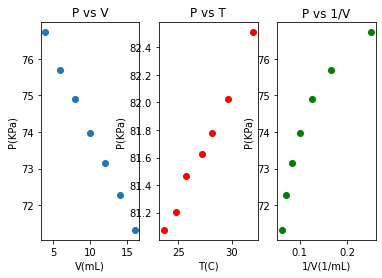

In [266]:
fig, ax = plt.subplots(1,3)

ax[0].scatter(datosPvsV['V(mL)'],datosPvsV['P(kPa)'])
ax[0].set_ylabel('P(KPa)')
ax[0].set_xlabel('V(mL)')
ax[0].set_title('P vs V')

ax[1].scatter(datosPvsT['T(C)'],datosPvsT['P(KPa)'],color='red')
ax[1].set_ylabel('P(KPa)')
ax[1].set_xlabel('T(C)')
ax[1].set_title('P vs T')

ax[2].scatter(datosPvsV['1/V(1/mL)'],datosPvsV['P(kPa)'],color='green')
ax[2].set_ylabel('P(KPa)')
ax[2].set_xlabel('1/V(1/mL)')
ax[2].set_title('P vs 1/V')


## P vs V

#### Ajuste datos P vs V (Logger Pro):

P = A*V^B
A: 82,15 +/- 0,6947(KPa/mL)
B: -0,04662 +/- 0,003951(adimensional)
Correlation: 0,9859

El exponente al ser negativo, nos indica la relación inversamente de crecimiento entre el volumen y la presión, a mayor magnitud, mayor es esta relación inversa de crecimiento; es decir para un mismo incremento de volumen habrá una mayor disminución de presión, se cumple un resultado similar si la la magnitud es menor.

#### Ajuste de datos lineal P vs(1/ V)(linealización):

$$P=\frac{1}{V}m+b$$

Hacemos una ajuste lineal P vs (1/V).
 
El ajuste P(1/V)=m*(1/V)+b,tiene como parámetros:
 
m=(26.7+-4.82)KPa*mL, b=(70.7+-0.662)kpa.
Gráficando P vs V con el ajuste y comparando los puntos experimentales tenemos:


Text(0.5, 1.0, 'P vs V')

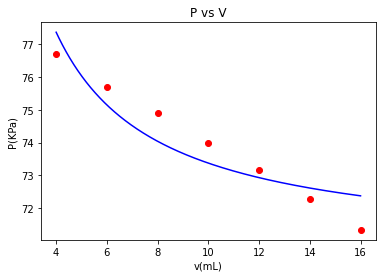

In [267]:
def func(x, m, b):
    return m*x+b

print('Hacemos una ajuste lineal P vs (1/V).')
print(' ')
ajuste,covarianza= curve_fit(func,datosPvsV['1/V(1/mL)'].tolist(),datosPvsV['P(kPa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],1)
b=round(ajuste[1],1)
Δm=round(desviacionestandar[0],2)
Δb=round(desviacionestandar[1],3)
print('El ajuste P(1/V)=m*(1/V)+b,tiene como parámetros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')KPa*mL,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')kpa.'))
print('Gráficando P vs V con el ajuste y comparando los puntos experimentales tenemos:')

fig,ax = plt.subplots() 
x0=datosPvsV['V(mL)'].tolist()[0]
xf=datosPvsV['V(mL)'].tolist()[-1]
x=np.linspace(x0,xf,1000)
ax.scatter(datosPvsV['V(mL)'],datosPvsV['P(kPa)'],color='red')
ax.plot(x,(1/x)*m+b,color='blue')
ax.set_xlabel('v(mL)')  
ax.set_ylabel('P(KPa)')  
ax.set_title('P vs V')


La pendiente del ajuste lineal P vs (1/V) significa la variación de la presión con el inverso de la temperatura. En otras palabras, el aumento de la presión correspondiente a un aumento en una unidad del 'inverso del volumen'

## P vs T

#### Ajuste de datos P vs T:

$$P=mT+b$$

Hacemos una ajuste lineal P vs T.
 
El ajuste es P(T)=m*(T)+b,tiene como parámetros:
 
m=(0.17+-0.007)KPa/C, b=(77.04+-0.2)KPa.
Gráficando el ajuste y comparando los puntos experimentales tenemos:


Text(0.5, 1.0, 'P vs T')

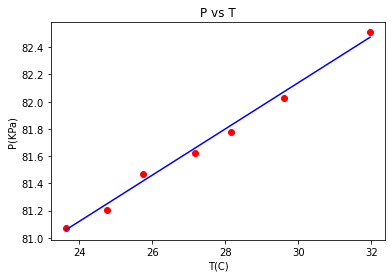

In [273]:
def func(x, m, b):
    return m*x+b

print('Hacemos una ajuste lineal P vs T.')
print(' ')
ajuste,covarianza= curve_fit(func,datosPvsT['T(C)'].tolist(),datosPvsT['P(KPa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],3)
b=round(ajuste[1],2)
Δm=round(desviacionestandar[0],3)
Δb=round(desviacionestandar[1],1)
print('El ajuste es P(T)=m*(T)+b,tiene como parámetros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')KPa/C,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')KPa.'))
print('Gráficando el ajuste y comparando los puntos experimentales tenemos:')

fig,ax = plt.subplots() 
x0=datosPvsT['T(C)'].tolist()[0]
xf=datosPvsT['T(C)'].tolist()[-1]
x=np.linspace(x0,xf,1000)
ax.scatter(datosPvsT['T(C)'],datosPvsT['P(KPa)'],color='red')
ax.plot(x,x*m+b,color='blue')
ax.set_xlabel('T(C)')  
ax.set_ylabel('P(KPa)')  
ax.set_title('P vs T')


En esto contexto la pendiente significa el aumento de presión a cada unidad de temperatura

#### Cero absoluto experimental

El punto donde la presión se hace cero, corresponde a una coordenada en T(C) de (-b/m), así podemos hallar el 0 absoluto en grados celsius experimentalmente. A continuación se muestra el 0 absoluto en grados celsius

In [274]:
'El cero absoluto obtenido experimentalmente es: '+str(round(-b/m))+' C'

'El cero absoluto obtenido experimentalmente es: -453 C'

#### Descartando datos para obtener un valor experimental más cercano al teórico

Se tuvieron que descartar la mayoría de los datos, ya que estos mismo se ajustaban muy bien a la recta; sin embargo cuando se elijen los 2 puntos a continuación, se puede notar de la gráfica anterior, que estos 2 datos se ajustan menos a la recta anterior y presentan a simple vista,un punto de corte mucho menor que el obtenido anteriormente.

In [275]:
datosPvsT2corr=pd.read_csv('Datos P vs T-datos descartados.txt')
print(datosPvsT2corr)
ajuste,covarianza= curve_fit(func,datosPvsT2corr['T(C)'].tolist(),datosPvsT2corr['P(KPa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],3)
b=round(ajuste[1],2)




   V(mL)     P(KPa)       T(C)
0      4  81.204281  24.762555
1      4  81.468607  25.742348


C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [276]:
'El cero absoluto obtenido experimentalmente(descartando datos) es: '+str(round(-b/m))+' C'

'El cero absoluto obtenido experimentalmente(descartando datos) es: -276 C'

#### Estimando la densidad del aire: (Debemos colocar las unidades correctamente)

$$P=mT+b$$
$$P=\frac{R \rho }{M}T$$
haciendo el ajuste lineal(m es el parámetro del ajuste) y despejando la densidad queda
$$\rho=\frac{Mm}{R}$$



Debido a que se usó la ecuación de los gases ideales,las unidades se modifican; es así como la presión se pasa a Pascales, la temperatura a Kelvin y la masa molar a kg/mol

In [261]:
M=28.966e-3#kg/mol
R=8.314#J/mol*K
datosPvsT2=pd.DataFrame()
datosPvsT2['T(K)']=datosPvsT['T(C)']+273.15
datosPvsT2['P(Pa)']=datosPvsT['P(KPa)']*1e3

def func(x, m):
    return m*x

print('Hacemos una ajuste lineal P vs T.')
print(' ')
ajuste,covarianza= curve_fit(func,datosPvsT2['T(K)'].tolist(),datosPvsT2['P(Pa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0])
Δm=round(desviacionestandar[0],3)
print('El ajuste es P(T)=m*(T),tiene como parámetros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')Pa/K,'))
rho=round((m*M)*(1/R),3)
Δrho=round((M/R)*Δm,3)
#unidades rho (kg/mol)*(Pa/K)*(mol*k/J)=kg*Pa*(1/J)=kg*(Newton/m**2)(1/Newton*metro)=kg/m**3
print('De la ecuación anterior, la densidad del aire(M=28.966g/mol y R=8.314J/mol*K) es(:',rho,'+-',Δrho,')kg/m**3')

Hacemos una ajuste lineal P vs T.
 
El ajuste es P(T)=m*(T),tiene como parámetros:
 
m=(272+-0.375)Pa/K,
De la ecuación anterior, la densidad del aire(M=28.966g/mol y R=8.314J/mol*K) es(: 0.948 +- 0.001 )kg/m**3


# Análisis cualitativo

#### ¿Cómo se comporta el volumen al aumentar T y mantener constante P?


Tenderá a aumentar,esto puede ser deducido de la ley del gas ideal

#### ¿Cómo se comporta la presión al aumentar T y mantener constante V ?


Tenderá a aumentar, esto puede ser deducido de la ley del gas ideal

#### En la sección de teoría se mencionó que el modelo del gas ideal tiende a fallar para bajas temperaturas y altas presiones ¿Cómo cree que difiere el volumen calculado con el modelo del gas ideal al volumen real cuando la presión es alta? (mayor, menor, no cambia). ¿Cómo cree que difiere la presión calculada con el modelo del gas ideal a la presión real cuando la temperatura es muy baja? (mayor, menor, no cambia). Justifique sus respuestas.


a) Cuando la presión es alta el volumen real es mayor al volumen ideal, ya que al haber mayor presión el volumen de las moléculas ya es apreciable,esto porque interaccionan más frecuentemente con ellas mismas en vez del recipiente y se necesita un pequeño volumen de exceso en comparación al gas ideal para una presión dada, esto para que las moléculas interaccionen más con el recipiente.
b)Cuando la temperatura es baja, las moléculas ''se mueven menos'', al moverse menos tienen más facilidad para interaccionar entre si por medio de fuerzas intramoleculares;esto ocasiona que al tratar de chocar con el recipiente, lo hagan con menos intensidad, ya que que sus compañeras jalan la molécula en dirección contraria al recipiente. Esta menor intensidad de los choques de las moléculas con la pared, se expresa en una presión menor a la del gas ideal(esto porque el modelo desprecia las interacciones intermoleculares)

# Conclusiones

Hemos comprobado la ley de los gases ideales, ya que como se aprecia hemos acertado númericamente sobre la relación de las variables
termodinámicas. Adicionalmente hemos usado esta ley para teorizar la temperatura con 'cero movimiento molecular' y calculado la densidad del aire.
Por último hemos hallado los siguientes valores experimentales con un error aceptable:
$$\rho aire=0.948$$
$$Cero absoluto=-276 C$$

    